<strong> <h1> <pre>PR: Assignment #1 Face Recognition</pre> </h1> </strong>
### Team Memebers:
*   19015267 - Ahmed Ashour El-Sayed Mohammed
*   17012296 - Abdelrahman Adel AbdelFattah
*   19016744 - Mayar Ayman Mahmoud Elkhouly

In [ ]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.io import imread
from numpy import array
import numpy as np
import cv2
import csv
# Conatants & Arrays
SAMPLES = 400
SUBJECTS = 40
INSTANCES = 10
K = array([1, 3, 5, 7])
ALPHA = array([0.8, 0.85, 0.9, 0.95])
# Debugging-purpose functions
def printWithTitle(title, A):
    print(f'\033[1m{title}:\033[0m'); print(A, end = "\n\n")

def printTitle(title, end = '\n'):
    print(f'\033[1m{title}:\033[0m', end = end)

# 1. **Download the Dataset and Understand the Format (10 Points)**
##### a. ORL dataset is available at the following link. https://www.kaggle.com/kasikrit/att-database-of-faces/
##### b. The dataset has 10 images per 40 subjects. Every image is a grayscale image of size 92x112.

# Acknowledgement


*   AT&T Database of Faces


&emsp;&emsp;UNIX is a trademark of UNIX System Laboratories, Inc.

&emsp;&emsp;Contact information
Copyright © 2002 AT&T Laboratories Cambridge

&emsp;&emsp;Credit: https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

In [ ]:
# Uplaod the zip file, then run this code to unzip it to run remaining cells with no issues
from zipfile import ZipFile
file_name = 'archive.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()

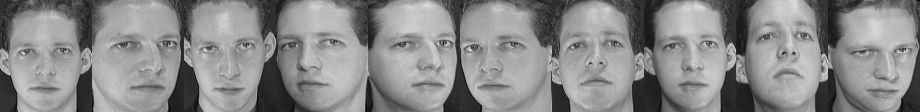

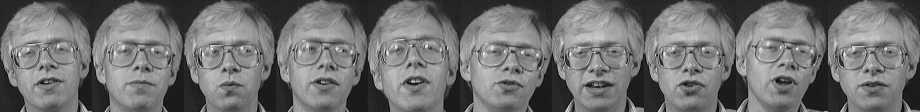

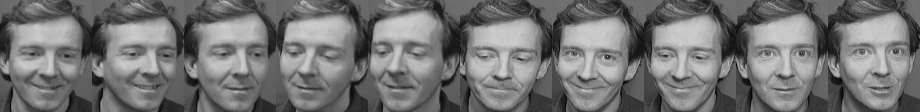

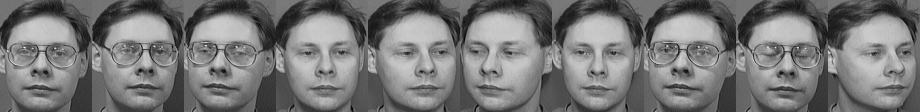

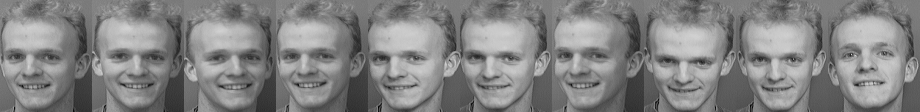

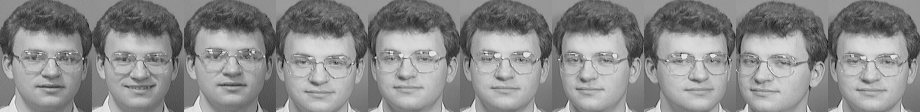

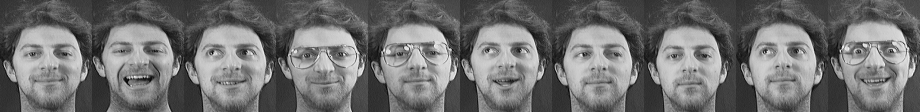

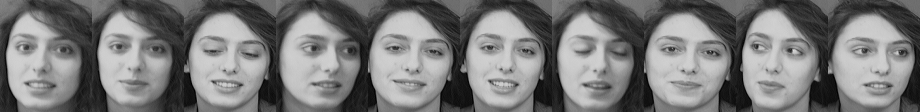

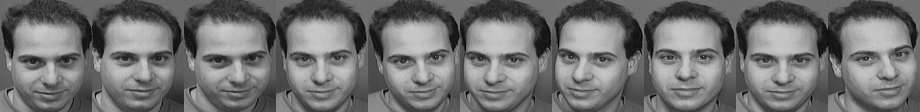

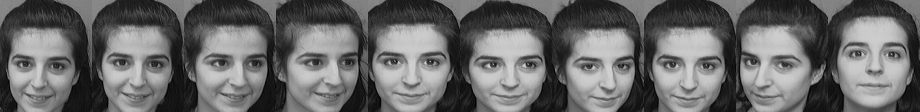

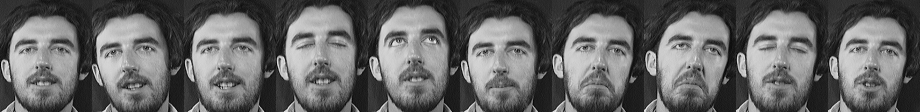

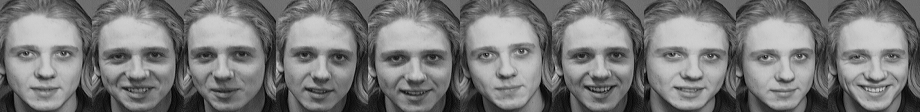

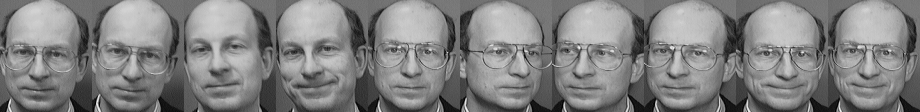

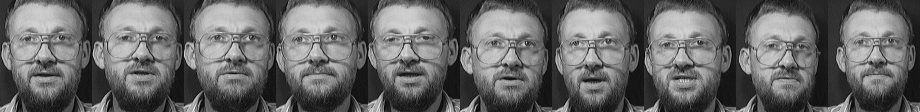

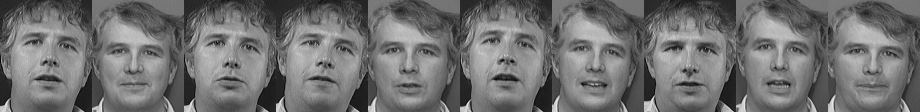

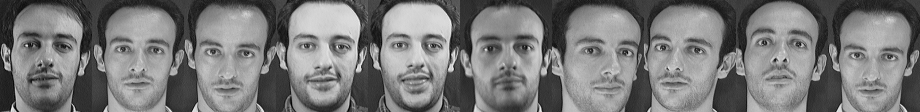

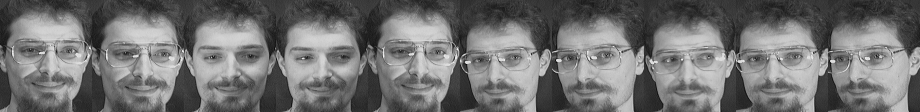

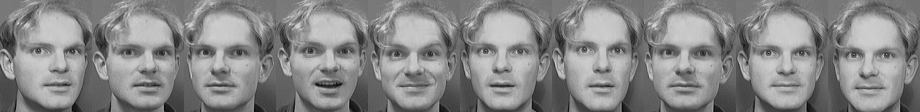

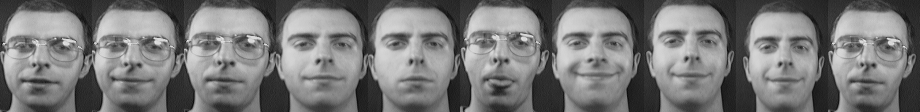

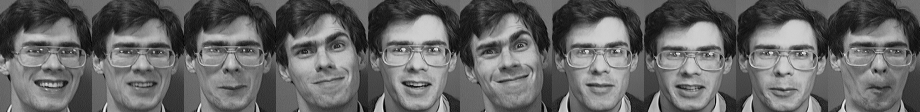

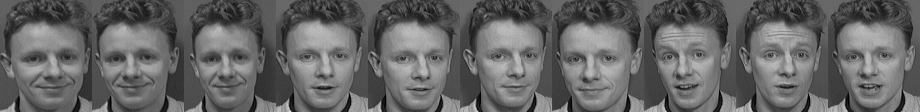

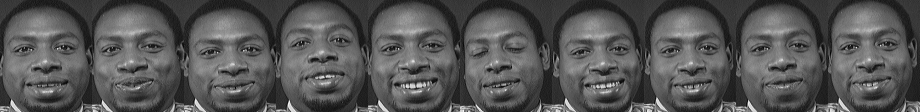

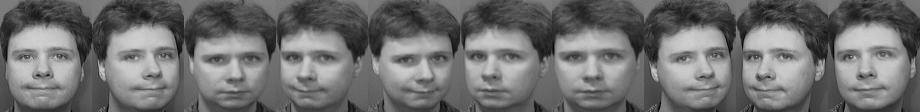

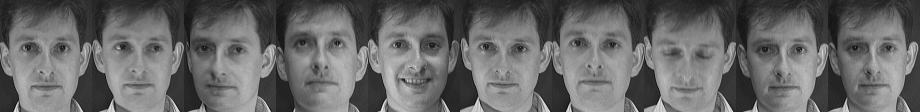

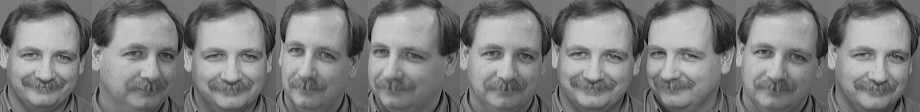

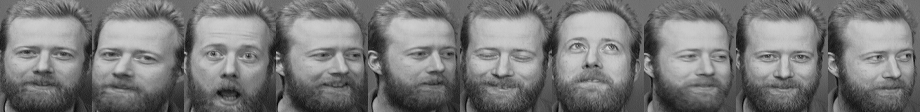

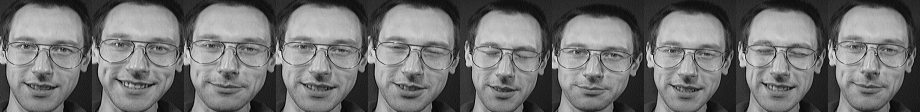

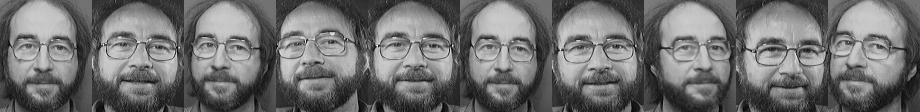

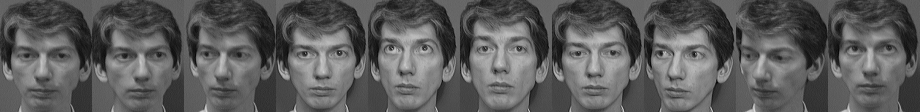

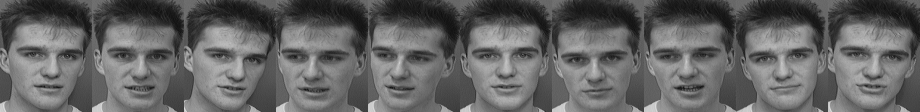

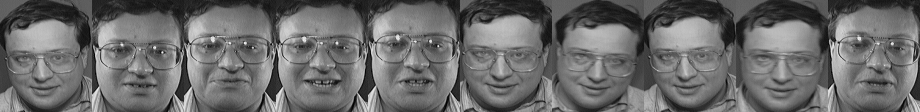

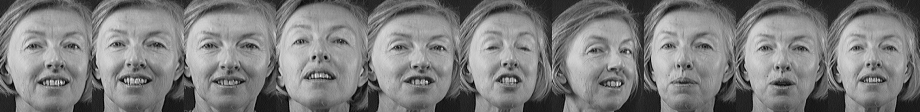

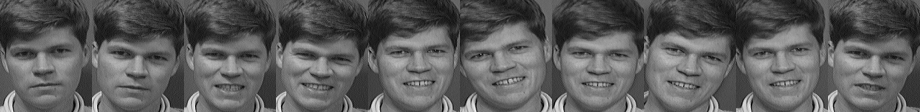

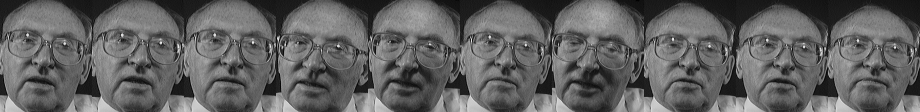

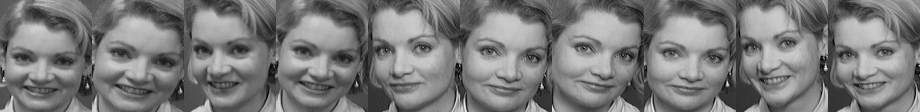

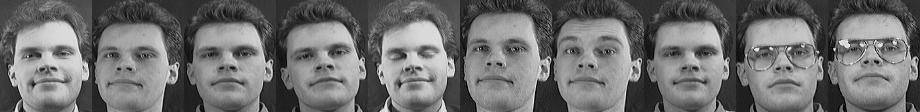

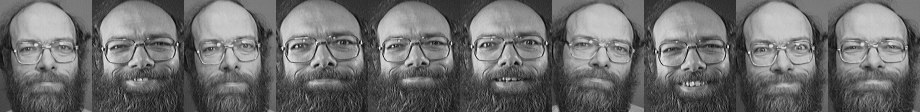

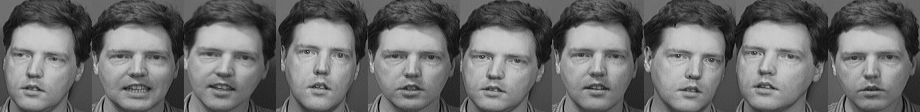

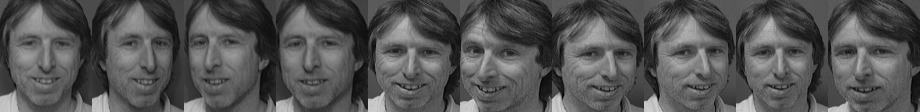

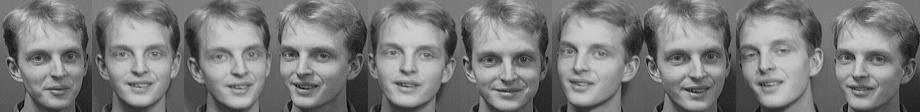

In [ ]:
# Done ^-^
# Showing all 400 images
for s in range(SUBJECTS): # 40 subjects
    images = array([[[0] * 92] * 112] * INSTANCES)
    for img in range(INSTANCES): # 10 images per subject
        images[img] = cv2.imread(f's{s+1}/{img+1}.pgm', cv2.IMREAD_UNCHANGED)
        person = np.concatenate(images, axis=1)
    cv2_imshow(person)

# 2. Generate the Data Matrix and the Label vector (10 Points)
##### a. Convert every image into a vector of 10304 values corresponding to the image size.
##### b. Stack the 400 vectors into a single Data Matrix D and generate the label vector y. The labels are integers from 1:40 corresponding to the subject id.

In [ ]:
# Functio to write the data into a .csv file, then read the date from it
# To avoid losing some data at runtime
def extract_data(subjects, images_per_subject, folder_name, file_name):
    open(f'{file_name}.csv', 'w')
    for s in range(subjects):
        for img in range(images_per_subject):
            image = imread(f'{folder_name}{s+1}/{img+1}.pgm').flatten() # flatten(): converts 2D to 1D
            with open(f'{file_name}.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow(image)
    return np.loadtxt(open(f'{file_name}.csv'), delimiter=",", dtype = int)

D = extract_data(SUBJECTS, INSTANCES, 's', 'data')
y = array([i for i in range(1, SUBJECTS + 1) for j in range(INSTANCES)])
printWithTitle("Data Matrix D" , (D, D.shape))
printWithTitle("Label Vector y", (y, y.shape))

Data Matrix D:
(array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]]), (400, 10304))

Label Vector y:
(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,

# 3. Split the Dataset into Training and Test sets (10 Points)
##### a. From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. This will give you 5 instances per person for training and 5 instances per person for testing.
##### b. Split the labels vector accordingly.

In [ ]:
(train_D, train_y) = (D[0 : SAMPLES : 2], y[0 : SAMPLES : 2]) # Training Data & labels
(test_D , test_y ) = (D[1 : SAMPLES : 2], y[1 : SAMPLES : 2]) # Testing  Data & labels
printWithTitle("Training Data", train_D); printWithTitle("Training Labels", train_y)
printWithTitle("Testing Data" , test_D ); printWithTitle("Testing Labels" , test_y )

Training Data:
[[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [128 125 125 ...  85  90  84]
 [129 127 133 ...  93  93  93]
 [119 120 120 ...  89  94  85]]

Training Labels:
[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40 40 40]

Testing Data:
[[ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 [ 43  50  41 ... 158 153 169]
 ...
 [123 121 126 ...  40  35  42]
 [125 119 124 ...  36

# 4. Classification using PCA (30 points)
##### a. Use the pseudo code below for computing the projection matrix U. Define the alpha = {0.8,0.85,0.9,0.95}
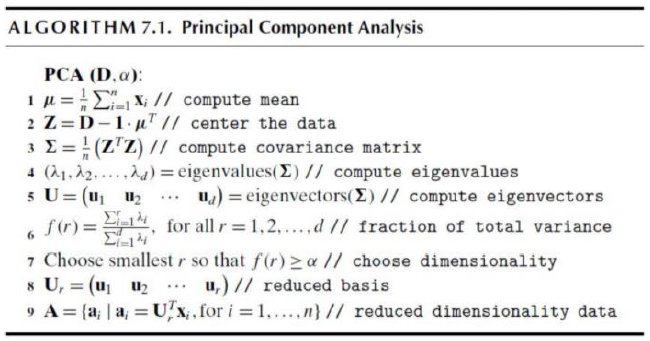
##### b. Project the training set, and test sets separately using the same projection matrix.
##### c. Use a simple classifier (first Nearest Neighbor to determine the class labels).
##### d. Report Accuracy for every value of alpha separately.
##### e. Can you find a relation between alpha and classification accuracy?

In [ ]:
def PCA_eigh(D):
    mean = np.mean(D, axis = 0)
    Z = np.matrix(D - mean)
    COV = (Z.T * Z) / Z.shape[0]
    lamdas, U = np.linalg.eigh(COV)
    # Sorting λ's & U descendingly according to values of λ's
    index_array = np.argsort(lamdas, axis=0)[::-1]
    eigenvalues = lamdas[index_array]
    eigenvectors = U[:, index_array]
    return eigenvalues, eigenvectors

def PCA_projMat(eigenvalues, eigenvectors, alpha):
    r, sum, fraction = 0, 0, 0
    eigenvalues_sum = eigenvalues.sum()
    for i in range(len(eigenvalues)):
        sum += eigenvalues[i]
        fraction = sum / eigenvalues_sum
        if (fraction >= alpha):
            r = i + 1; break
    return eigenvectors[:, 0 : r]

def data_projection(D, U):
    return np.dot(D, U)

def data_recovering(A, U):
    return np.dot(A, U.T)

def KNN(k, train, train_labels, test, test_labels):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(np.asarray(train), train_labels)
    y_predicted = knn.predict(np.asarray(test))
    return y_predicted, float(knn.score(np.asarray(test), test_labels))

In [ ]:
eigenvalues, eigenvectors = PCA_eigh(train_D)
PCA_accuracy = array([0.0] * len(ALPHA))
printTitle('PCA-Accuracy using 1-NN')

# for each alpha value
for a in range(len(ALPHA)):
    print(f'\tAt alpha = {ALPHA[a]}', end = '');
    print(' ' if a%2==0 else '', end = '')

    # Projection Matrix 
    U = PCA_projMat(eigenvalues, eigenvectors, ALPHA[a])

    # Projecting both Training & Test data
    train_projected = data_projection(train_D, U)
    test_projected = data_projection(test_D, U)

    # Classify the projected data using 1-NN Classifier
    test_predicted, PCA_accuracy[a] = KNN(1, train_projected, train_y, test_projected, test_y)
    print(', accuracy =', PCA_accuracy[a])

PCA-Accuracy using 1-NN:
	At alpha = 0.8 , accuracy = 0.95
	At alpha = 0.85, accuracy = 0.95
	At alpha = 0.9 , accuracy = 0.94
	At alpha = 0.95, accuracy = 0.94


# 5. Classification Using LDA (30 Points)
##### a. Use the pseudo code below for LDA. We will modify few lines in pseudocode to handle multiclass LDA.
##### &emsp;&emsp;i. Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.
##### &emsp;&emsp;ii. Replace B matrix by Sb.
##### &emsp;&emsp;&emsp;&emsp;𝑆<sub>𝑏</sub> = <sub>𝑘=1</sub> Σ <sup>𝑚</sup> 𝑛𝑘(𝜇𝑘−𝜇)(𝜇𝑘−𝜇)<sup>𝑇</sup>
Here, m is the number of classes, 𝜇 is the overall sample mean, and 𝑛𝑘 is the number of samples in the k-th class.
##### &emsp;&emsp;iii. S matrix remains the same, but it sums S1, S2, S3, ...S40.
##### &emsp;&emsp;iv. Use 39 dominant eigenvectors instead of just one. You will have a projection matrix U39x10304.
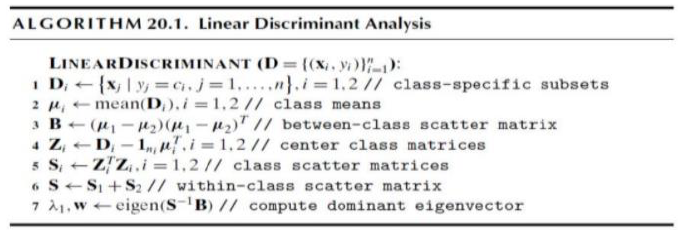
##### b. Project the training set, and test sets separately using the same projection matrix U. You will have 39 dimensions in the new space.
##### c. Use a simple classifier (first Nearest Neighbor to determine the class labels).
##### d. Report accuracy for the multiclass LDA on the face recognition dataset.
##### e. Compare the results to PCA results.

In [ ]:
def LDA(train_D, instances , classes):

  overall_mean = np.mean(train_D, axis = 0)
  overall_mean = overall_mean.reshape(10304, 1)
  printWithTitle("overALL_mean",overall_mean)

  classes_data = []
  c=0
  for i in range(classes):
    data=train_D[c : c+instances]
    classes_data.append(data)
    c += instances                 # 5 is the number of instances
  printWithTitle("classes_data dim ",np.array(classes_data).shape)

  classes_means = []
  for i in range(classes):
      mean = np.mean(classes_data[i], axis = 0)
      classes_means.append(mean.reshape(10304,1))
  printWithTitle("classes_means dim ",np.array(classes_means).shape)
  printWithTitle("means for each class ",np.array(classes_means))

#finding Sb with size 10304 * 10304 
  Sb= np.zeros((10304, 10304))
  for i in range(classes):
      means_diffrence = classes_means[i] - overall_mean
      temp =  np.dot(instances, np.dot( means_diffrence, means_diffrence.T))
      Sb = np.add(Sb,temp)

  #print(Sb)
  print(Sb.shape)
  
  s = np.zeros((10304, 10304))
  for i in range(classes):
    z = classes_data[i] - classes_means[i].T
    s = np.add(s, np.dot(z.T, z))  #sum from s1 to s40

  s_inverse = np.linalg.inv(s)
  s_invB=np.dot(s_inverse, Sb)
  eigen_values, eigen_vectors = np.linalg.eigh(s_invB)   ##############

  return eigen_values, eigen_vectors



lda_val , lda_vec =LDA(train_D,5,40)
printWithTitle("eigen_values",lda_val)
printWithTitle("eigen_values",lda_val.shape)
printWithTitle("eigen_vectors",lda_vec)


overALL_mean:
[[86.115]
 [86.265]
 [86.685]
 ...
 [76.5  ]
 [77.395]
 [77.085]]

classes_data dim :
(40, 5, 10304)

classes_means dim :
(40, 10304, 1)

means for each class :
[[[ 46.8]
  [ 51.4]
  [ 53.8]
  ...
  [ 37.6]
  [ 37.8]
  [ 38.6]]

 [[ 36.2]
  [ 35.8]
  [ 36. ]
  ...
  [ 97.4]
  [ 99.8]
  [ 97.2]]

 [[103.6]
  [107. ]
  [104.4]
  ...
  [ 47.2]
  [ 49.6]
  [ 47. ]]

 ...

 [[106.2]
  [109.2]
  [107.4]
  ...
  [ 70. ]
  [ 63.4]
  [ 61.8]]

 [[ 84.6]
  [ 87.2]
  [ 83.8]
  ...
  [127. ]
  [123.4]
  [122.8]]

 [[125.2]
  [123.6]
  [125.4]
  ...
  [ 78.4]
  [ 82. ]
  [ 77.8]]]

(10304, 10304)
eigen_values:
[-6.70582226e+19 -2.36649856e+19 -1.36597447e+19 ...  1.35284364e+19
  2.34794080e+19  6.65316739e+19]

eigen_values:
(10304,)

eigen_vectors:
[[ 0.00473345  0.00367938 -0.00175521 ...  0.00142421 -0.00379362
  -0.00471061]
 [ 0.00446036  0.00346398 -0.0016324  ...  0.00130033 -0.00355692
  -0.00443112]
 [ 0.00410927  0.00308321 -0.00140735 ...  0.00103901 -0.00314311
  -0.00406

In [ ]:
def projection(train_D, test_D , instances , classes , eigen_values , eigen_vectors ):

 #sorting the eigen value and eigen vector
  idx=eigen_values.argsort()[::-1]
  eigen_values=eigen_values[idx]
  eigen_vectors=eigen_vectors[:,idx]

  projection_mat= eigen_vectors[:,:classes-1]
  # data after projection
  projected_train = np.dot(train_D, projection_mat)
  #printWithTitle("projected train data dim",projected_train.shape)
  projected_test = np.dot(test_D, projection_mat)
  #printWithTitle("projected test data dim",projected_test.shape)

  return projected_train, projected_test

p_train , p_test = projection(train_D, test_D , 5 , 40 , lda_val , lda_vec)
printWithTitle("projected train data dim",p_train.shape)
printWithTitle("projected test data dim",p_test.shape)
  


projected train data dim:
(200, 39)

projected test data dim:
(200, 39)



In [ ]:
test_predicted, LDA_accuracy = KNN(1, p_train, train_y, p_test, test_y)
printWithTitle("n-neighbours",test_predicted)
printWithTitle("LDA Accuracy",LDA_accuracy)

n-neighbours:
[ 1  1  1  1 16  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
 40  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10  8 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 37 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 25 15 35 25  5 36 36 36 36 17 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40  5 40 40 40]

LDA Accuracy:
0.95



# 6. Classifier Tuning (20 Points)
##### a. Set the number of neighbors in the K-NN classifier to 1,3,5,7.
##### b. Tie breaking at your preferred strategy.
##### c. Plot (or tabulate) the performance measure (accuracy) against the K value. This is to be done for PCA and LDA as well.

In [ ]:
def KNN_weighted(k, train, train_labels, test, test_labels):
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(np.asarray(train), train_labels)
    y_predicted = knn.predict(np.asarray(test))
    return y_predicted, float(knn.score(np.asarray(test), test_labels))

In [ ]:
# Applying K-NN on PCA
K_PCA_results = {}
for k in K:
  print(f'At K = {k}')
  for a in range(len(ALPHA)):
      print(f'\tAt alpha = {ALPHA[a]}', end = ''); print(' ' if a%2==0 else '', end = '')
      U = PCA_projMat(eigenvalues, eigenvectors, ALPHA[a])
      train_projected = data_projection(train_D, U)
      test_projected = data_projection(test_D, U)
      test_predicted, PCA_accuracy[a] = KNN_weighted(k, train_projected, train_y, test_projected, test_y)
      print(', accuracy =', PCA_accuracy[a])
  K_PCA_results[k] = array(PCA_accuracy, copy=True)
print(K_PCA_results)

At K = 1
	At alpha = 0.8 , accuracy = 0.95
	At alpha = 0.85, accuracy = 0.95
	At alpha = 0.9 , accuracy = 0.94
	At alpha = 0.95, accuracy = 0.94
At K = 3
	At alpha = 0.8 , accuracy = 0.93
	At alpha = 0.85, accuracy = 0.93
	At alpha = 0.9 , accuracy = 0.93
	At alpha = 0.95, accuracy = 0.92
At K = 5
	At alpha = 0.8 , accuracy = 0.93
	At alpha = 0.85, accuracy = 0.915
	At alpha = 0.9 , accuracy = 0.905
	At alpha = 0.95, accuracy = 0.895
At K = 7
	At alpha = 0.8 , accuracy = 0.91
	At alpha = 0.85, accuracy = 0.875
	At alpha = 0.9 , accuracy = 0.875
	At alpha = 0.95, accuracy = 0.855
{1: array([0.95, 0.95, 0.94, 0.94]), 3: array([0.93, 0.93, 0.93, 0.92]), 5: array([0.93 , 0.915, 0.905, 0.895]), 7: array([0.91 , 0.875, 0.875, 0.855])}


In [ ]:
# Applying K-NN on LDA
K_LDA_results = {}
for k in K:
  print(f'At K = {k}')
  p_train , p_test = projection(train_D, test_D , 5 , 40 , lda_val , lda_vec)
  printWithTitle("projected train data dim",p_train.shape)
  printWithTitle("projected test data dim",p_test.shape)

  test_predicted, LDA_accuracy = KNN_weighted(k, p_train, train_y, p_test, test_y)
  printWithTitle("n-neighbours",test_predicted)
  printWithTitle("LDA Accuracy",LDA_accuracy)
  K_LDA_results[k] = LDA_accuracy
print(K_LDA_results)

At K = 1
projected train data dim:
(200, 39)

projected test data dim:
(200, 39)

n-neighbours:
[ 1  1  1  1 16  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
 40  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10  8 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 37 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 25 15 35 25  5 36 36 36 36 17 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40  5 40 40 40]

LDA Accuracy:
0.95

At K = 3
projected train data dim:
(200, 39)

projected test data dim:
(200, 39)

n-neighbours:
[ 1  1  1  1 16  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
 40  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10  3 11 11 11 11 11 12 12 12 

# 7. Compare vs Non-Face Images (15 Points)
##### a. Download non-face images and make them of the same size 92x112. and try to solve the classification problem faces vs. Non-faces.
##### &emsp;&emsp;i. Show failure and success cases.
##### &emsp;&emsp;ii. How many dominant eigenvectors will you use for the LDA solution?
##### &emsp;&emsp;iii. Plot the accuracy vs the number of non-faces images while fixing the number of face images.
##### &emsp;&emsp;iv. Criticize the accuracy measure for large numbers of non-faces images in the training data.

In [ ]:
# Unzipping the files of the face and not face data.
file_name = 'archive2.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()

In [ ]:
F_OR_NO_F_CLASSES = 2
IMAGES_PER_F = 400
SAMPLE_SIZE_2 = 800

import random
def printImages(Data):
    i = 0; images = array([[[0] * 92] * 112] * 10)
    for img in range(len(Data)):
        images[i] = Data[img].reshape((112, 92))
        i += 1
        person = np.concatenate(images, axis=1)
        if i == 10 or img + 1 == len(Data):
            i = 0
            images = array([[[0] * 92] * 112] * 10)
            cv2_imshow(person)

def show_some_success_and_failure(data, data_labels, predicted_labels):
    success = []
    failure = []
    for d in range(len(data)):
        if data_labels[d] == predicted_labels[d]:
            success.append(data[d])
        else:
            failure.append(data[d])
    printTitle('Success Cases', '\n\n'); printImages(array(random.sample(success, 10)))
    print()
    printTitle('Failure Cases', '\n\n'); printImages(array(random.sample(failure, 10)))
    print()

In [ ]:
# Reading the data in a D matrix and Y labels vector
D = extract_data(2, 400, 'f', 'data2')
y = array([i for i in range(1, F_OR_NO_F_CLASSES + 1) for j in range(IMAGES_PER_F)])
# Debugging
printWithTitle("Data Matrix D" , (D, D.shape))
# printWithTitle("Label Vector y", (y, y.shape))

Data Matrix D:
(array([[105, 104, 102, ..., 173, 161, 122],
       [128, 123, 128, ...,  79,  77,  83],
       [ 66,  68,  66, ...,  72,  72,  76],
       ...,
       [254, 255, 255, ..., 255, 255, 254],
       [252, 252, 251, ..., 253, 253, 253],
       [ 34,  15,   5, ..., 176, 180, 180]]), (800, 10304))



In [ ]:
(train2_D, train2_y) = (D[0 : SAMPLE_SIZE_2 : 2], y[0 : SAMPLE_SIZE_2 : 2]) # Training Data & labels
(test2_D , test2_y ) = (D[1 : SAMPLE_SIZE_2 : 2], y[1 : SAMPLE_SIZE_2 : 2]) # Testing  Data & labels

# Debugging
# printWithTitle("Training Data", train2_D)
# printWithTitle("Training Labels", train2_y)
# printWithTitle("Testing Data" , test2_D )
# printWithTitle("Testing Labels" , test2_y )

In [ ]:
# Performing PCA on Face and Non-Face images
eigenvalues2, eigenvectors2 = PCA_eigh(train2_D)

At K = 1
	At alpha = 0.8 , accuracy = 0.945
Success Cases:



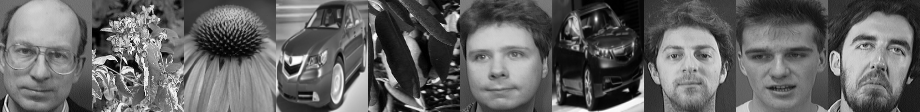


Failure Cases:



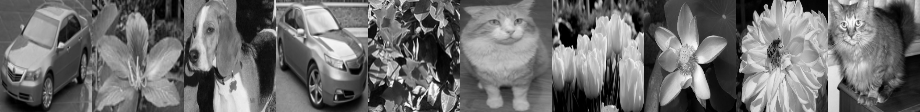


	At alpha = 0.85, accuracy = 0.94
Success Cases:



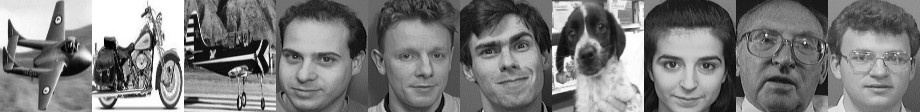


Failure Cases:



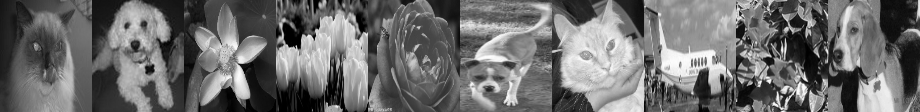


	At alpha = 0.9 , accuracy = 0.915
Success Cases:



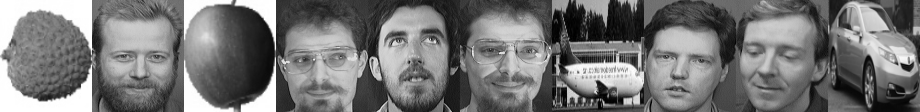


Failure Cases:



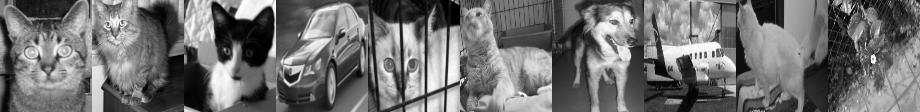


	At alpha = 0.95, accuracy = 0.89
Success Cases:



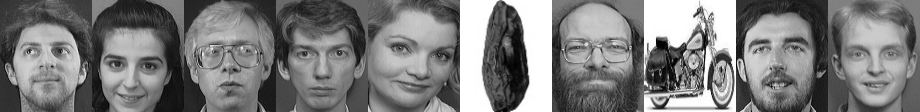


Failure Cases:



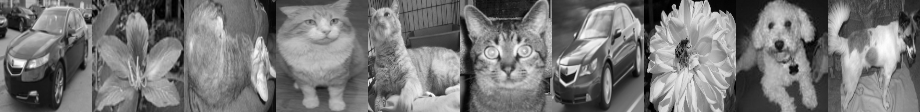


At K = 3
	At alpha = 0.8 , accuracy = 0.945
Success Cases:



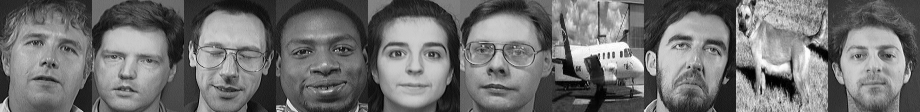


Failure Cases:



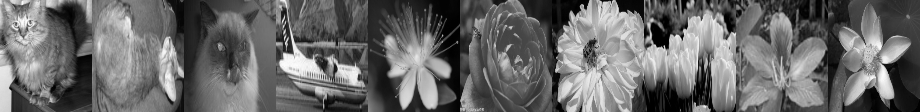


	At alpha = 0.85, accuracy = 0.94
Success Cases:



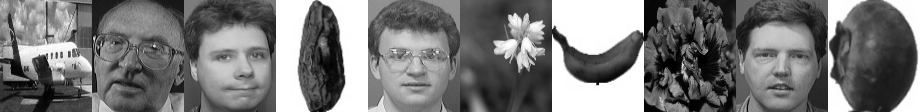


Failure Cases:



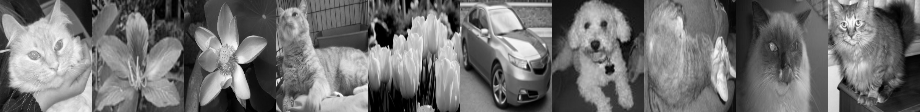


	At alpha = 0.9 , accuracy = 0.915
Success Cases:



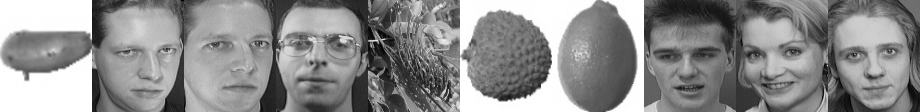


Failure Cases:



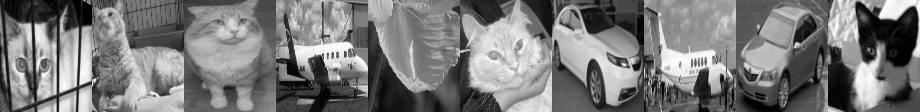


	At alpha = 0.95, accuracy = 0.89
Success Cases:



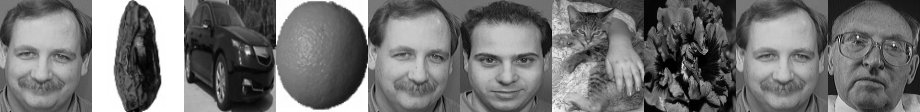


Failure Cases:



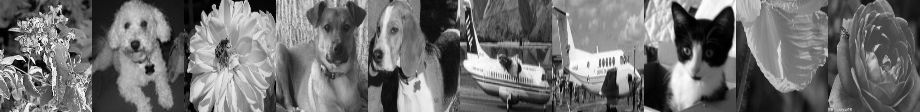


At K = 5
	At alpha = 0.8 , accuracy = 0.945
Success Cases:



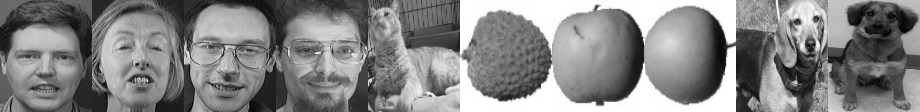


Failure Cases:



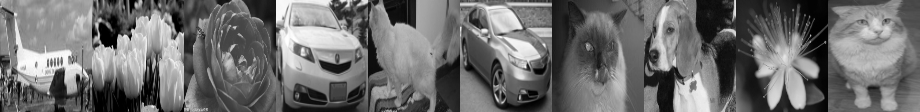


	At alpha = 0.85, accuracy = 0.94
Success Cases:



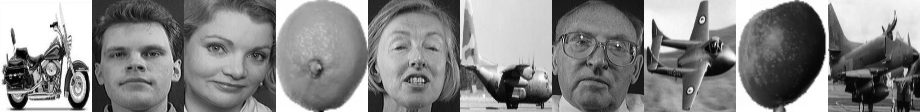


Failure Cases:



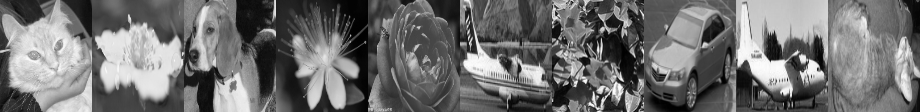


	At alpha = 0.9 , accuracy = 0.915
Success Cases:



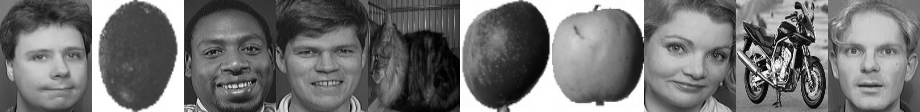


Failure Cases:



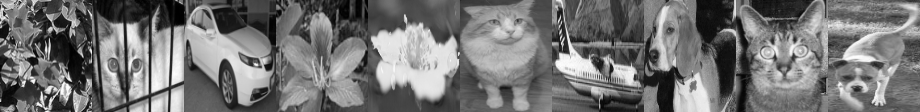


	At alpha = 0.95, accuracy = 0.89
Success Cases:



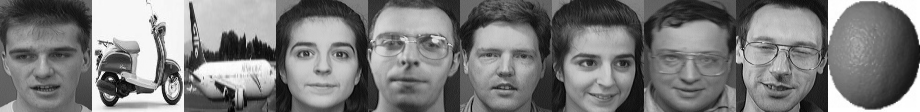


Failure Cases:



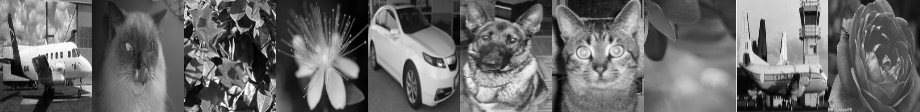


At K = 7
	At alpha = 0.8 , accuracy = 0.945
Success Cases:



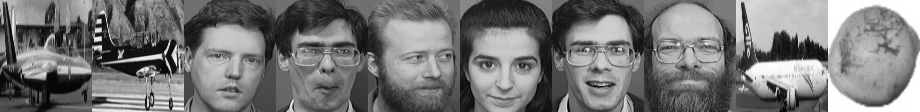


Failure Cases:



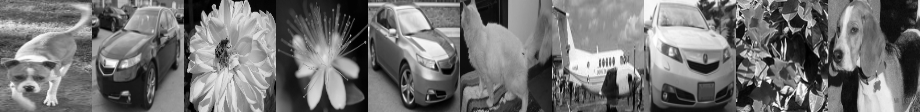


	At alpha = 0.85, accuracy = 0.94
Success Cases:



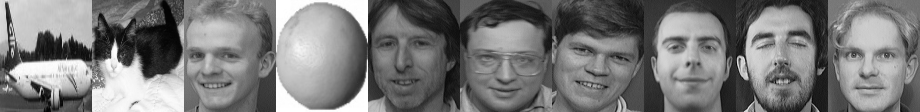


Failure Cases:



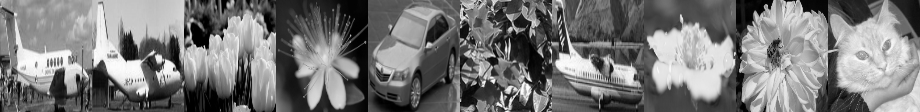


	At alpha = 0.9 , accuracy = 0.915
Success Cases:



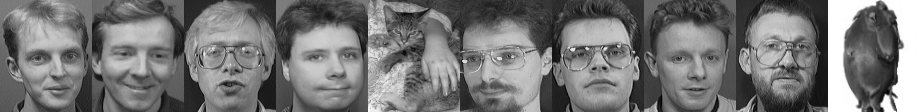


Failure Cases:



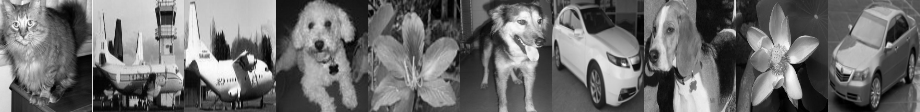


	At alpha = 0.95, accuracy = 0.89
Success Cases:



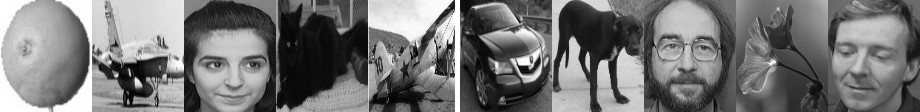


Failure Cases:



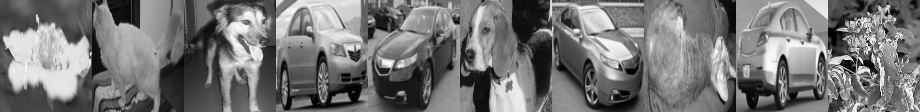


{1: array([0.945, 0.94 , 0.915, 0.89 ]), 3: array([0.945, 0.94 , 0.915, 0.89 ]), 5: array([0.945, 0.94 , 0.915, 0.89 ]), 7: array([0.945, 0.94 , 0.915, 0.89 ])}


In [ ]:
K_PCA2_results = {}
for k in K:
  print(f'At K = {k}')
  for a in range(len(ALPHA)):
      print(f'\tAt alpha = {ALPHA[a]}', end = ''); print(' ' if a%2==0 else '', end = '')
      U = PCA_projMat(eigenvalues2, eigenvectors2, ALPHA[a])
      train_projected = data_projection(train2_D, U)
      test_projected = data_projection(test2_D, U)
      test_predicted, PCA_accuracy[a] = KNN_weighted(1, train_projected, train2_y, test_projected, test2_y)
      print(', accuracy =', PCA_accuracy[a])
      show_some_success_and_failure(test2_D, test2_y, test_predicted) # Success/Failure
  K_PCA2_results[k] = array(PCA_accuracy, copy=True)
print(K_PCA2_results)

In [ ]:
# Performing LDA on Face and No Face
lda2_val , lda2_vec =LDA(train2_D,200,2)
printWithTitle("eigen_values",lda2_val)
printWithTitle("eigen_values",lda2_val.shape)
printWithTitle("eigen_vectors",lda2_vec)

overALL_mean:
[[131.07  ]
 [130.3175]
 [130.7   ]
 ...
 [123.745 ]
 [123.505 ]
 [123.475 ]]

classes_data dim :
(2, 200, 10304)

classes_means dim :
(2, 10304, 1)

means for each class :
[[[ 86.97 ]
  [ 86.84 ]
  [ 87.255]
  ...
  [ 76.615]
  [ 76.07 ]
  [ 75.08 ]]

 [[175.17 ]
  [173.795]
  [174.145]
  ...
  [170.875]
  [170.94 ]
  [171.87 ]]]

(10304, 10304)
eigen_values:
[-6.95460307e+17 -2.80263902e+17 -1.90764952e+17 ...  1.87223033e+17
  2.81561730e+17  6.95649000e+17]

eigen_values:
(10304,)

eigen_vectors:
[[-0.02853509  0.01829337 -0.03002623 ...  0.03014116 -0.01772331
  -0.02858232]
 [-0.02817389  0.01810131 -0.02976194 ...  0.02955251 -0.01740932
  -0.02813721]
 [-0.02810055  0.01800451 -0.02953872 ...  0.02973488 -0.01747633
  -0.02816846]
 ...
 [-0.00104904 -0.00237118 -0.0012939  ... -0.00129207 -0.00235764
   0.00104466]
 [-0.00479477 -0.01082626 -0.00590268 ... -0.00592569 -0.01080287
   0.00478163]
 [-0.00069869 -0.00157766 -0.00086019 ... -0.00086339 -0.00157405
   0

At K = 1
projected train data dim:
(400, 2)

projected test data dim:
(400, 2)

n-neighbours:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2
 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2
 1 1 2 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 1 1 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

LDA Accuracy:
0.855

Success Cases:



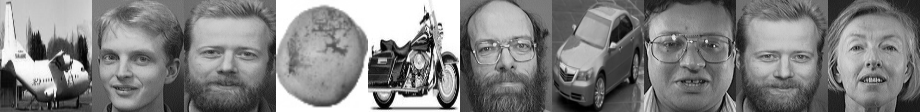


Failure Cases:



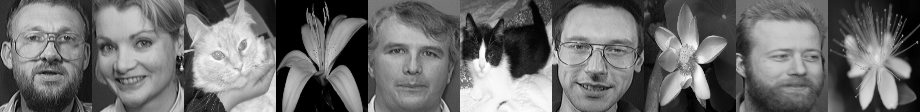


At K = 3
projected train data dim:
(400, 2)

projected test data dim:
(400, 2)

n-neighbours:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 1 1 2 2 1 2 2 2 2 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]

LDA Accuracy:
0.865

Success Cases:



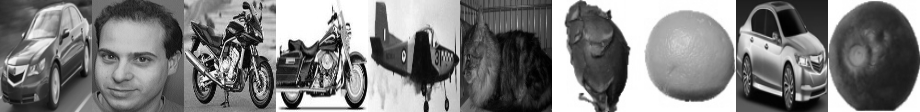


Failure Cases:



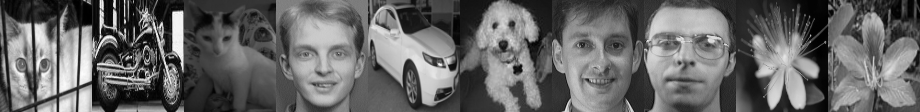


At K = 5
projected train data dim:
(400, 2)

projected test data dim:
(400, 2)

n-neighbours:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]

LDA Accuracy:
0.8775

Success Cases:



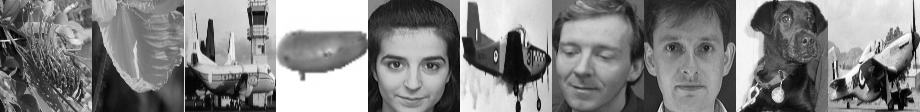


Failure Cases:



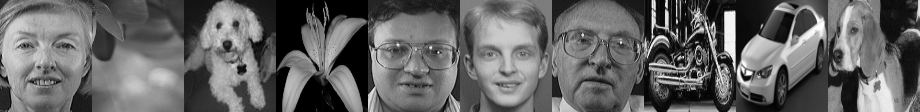


At K = 7
projected train data dim:
(400, 2)

projected test data dim:
(400, 2)

n-neighbours:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 2 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]

LDA Accuracy:
0.8825

Success Cases:



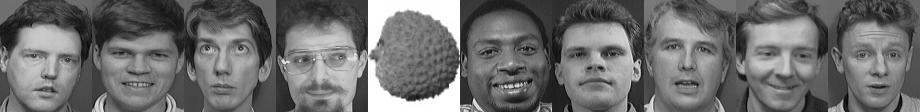


Failure Cases:



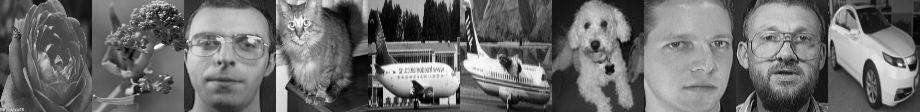


{1: 0.855, 3: 0.865, 5: 0.8775, 7: 0.8825}


In [ ]:
def projection_modified(train_D, test_D , instances , classes, dominant_values , eigen_values , eigen_vectors ):
  idx=eigen_values.argsort()[::-1]
  eigen_values=eigen_values[idx]
  eigen_vectors=eigen_vectors[:,idx]
  projection_mat= eigen_vectors[:,:dominant_values]
  projected_train = np.dot(train_D, projection_mat)
  projected_test = np.dot(test_D, projection_mat)
  return projected_train, projected_test

K_LDA2_results = {}
for k in K:
  print(f'At K = {k}')
  p_train , p_test = projection_modified(train2_D, test2_D , 200, 2, 2, lda2_val , lda2_vec)
  printWithTitle("projected train data dim",p_train.shape)
  printWithTitle("projected test data dim",p_test.shape)

  test_predicted, LDA_accuracy = KNN_weighted(k, p_train, train2_y, p_test, test2_y)
  printWithTitle("n-neighbours",test_predicted)
  printWithTitle("LDA Accuracy",LDA_accuracy)
  show_some_success_and_failure(test2_D, test2_y, test_predicted)
  K_LDA2_results[k] = LDA_accuracy
print(K_LDA2_results)

# 8. Bonus (5 Points)

##### a. [5 points] Use different Training and Test splits. Change the number of instances per subject to be 7 and keep 3 instances per subject for testing. compare the results you have with the ones you got earlier with 50% split.

Splitting

In [ ]:
new_train_D = array([D[j] for i in range(0, SAMPLES, INSTANCES) for j in range(i, i+4)]) # (160, 10304)
new_train_y = array([i for i in range(1, SUBJECTS + 1) for j in range(4)]) # (160,)
new_test_D  = array([D[j] for i in range(0, SAMPLES, INSTANCES) for j in range(i+4, i+7)]) # (120, 10304)
new_test_y  = array([i for i in range(1, SUBJECTS + 1) for j in range(3)]) # (120,)
printWithTitle('Training set', (new_train_D, new_train_D.shape))
printWithTitle('Training labels', (new_train_y, new_train_y.shape))
printWithTitle('Test set', (new_test_D, new_test_D.shape))
printWithTitle('Test labels', (new_test_y, new_test_y.shape))

Training set:
(array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [127, 131, 128, ...,  94,  84,  89],
       [131, 125, 126, ...,  89,  93,  91],
       [130, 123, 127, ...,  33,  37,  40]]), (160, 10304))

Training labels:
(array([ 1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  5,
        5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,
        9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13,
       13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17,
       18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22,
       22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26,
       26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30,
       30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34,
       35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39,

PCA - after new splitting

In [ ]:
eigenvalues_PCA, eigenvectors_PCA = PCA_eigh(new_train_D)
PCA_accuracy = array([[0.0] * len(ALPHA)] * len(K))
printTitle('Bonus-a (new split) on PCA')
for k in range(len(K)): # for each k value
    printTitle(f'K = {K[k]}')
    for a in range(len(ALPHA)): # for each α value
        print(f'\tAt alpha = {ALPHA[a]}', end = '')
        print(' ' if a%2==0 else '', end = '')
        # Projection Matrix
        U = PCA_projMat(eigenvalues_PCA, eigenvectors_PCA, ALPHA[a])
        # Projecting both Training & Test data
        train_projected = data_projection(new_train_D, U)
        test_projected = data_projection(new_test_D, U)
        # Classify the projected data using KNN Classifier
        test_predicted, PCA_accuracy[k][a] = KNN(K[k], train_projected, new_train_y, test_projected, new_test_y)
        print(', accuracy =', round(PCA_accuracy[k][a], 5))

Bonus-a Splitting (PCA):
K = 1:
	At alpha = 0.8 , accuracy = 0.875
	At alpha = 0.85, accuracy = 0.89167
	At alpha = 0.9 , accuracy = 0.9
	At alpha = 0.95, accuracy = 0.89167
K = 3:
	At alpha = 0.8 , accuracy = 0.79167
	At alpha = 0.85, accuracy = 0.80833
	At alpha = 0.9 , accuracy = 0.825
	At alpha = 0.95, accuracy = 0.81667
K = 5:
	At alpha = 0.8 , accuracy = 0.74167
	At alpha = 0.85, accuracy = 0.75
	At alpha = 0.9 , accuracy = 0.725
	At alpha = 0.95, accuracy = 0.725
K = 7:
	At alpha = 0.8 , accuracy = 0.65833
	At alpha = 0.85, accuracy = 0.675
	At alpha = 0.9 , accuracy = 0.675
	At alpha = 0.95, accuracy = 0.65833


LDA - after new splitting

In [ ]:
eigenvalues_LDA , eigenvectors_LDA = LDA(new_train_D, 4, 40)
p_train , p_test = projection(new_train_D, new_test_D , 4 , 40 , eigenvalues_LDA , eigenvectors_LDA)
LDA_accuracy = array([0.0] * len(K))
printTitle('Bonus-a (new split) on LDA')
for k in range(len(K)):
    printTitle(f'K = {K[k]}', end = ' ')
    test_predict, LDA_accuracy[k] = KNN(K[k], p_train, new_train_y, p_test, new_test_y)
    print('accuracy =', round(LDA_accuracy[k], 5))

overALL_mean:
[[84.73125]
 [84.65   ]
 [85.3625 ]
 ...
 [71.80625]
 [72.25   ]
 [70.76875]]

classes_data dim :
(40, 4, 10304)

classes_means dim :
(40, 10304, 1)

means for each class :
[[[ 52.5 ]
  [ 51.5 ]
  [ 48.75]
  ...
  [ 37.25]
  [ 29.  ]
  [ 33.25]]

 [[ 34.  ]
  [ 36.  ]
  [ 35.5 ]
  ...
  [ 57.  ]
  [ 56.75]
  [ 57.  ]]

 [[102.25]
  [103.  ]
  [105.5 ]
  ...
  [ 44.  ]
  [ 41.25]
  [ 42.25]]

 ...

 [[106.5 ]
  [109.5 ]
  [110.  ]
  ...
  [ 63.  ]
  [ 65.25]
  [ 65.25]]

 [[ 76.5 ]
  [ 77.75]
  [ 78.25]
  ...
  [124.  ]
  [123.  ]
  [121.25]]

 [[126.75]
  [125.  ]
  [126.  ]
  ...
  [ 63.  ]
  [ 63.5 ]
  [ 64.  ]]]

(10304, 10304)
Bonus-a (new split) on LDA:
K = 1: accuracy = 0.9
K = 3: accuracy = 0.8
K = 5: accuracy = 0.75
K = 7: accuracy = 0.69167


##### b. [10 points] There are other variations of PCA and LDA beyond the original algorithms. Please use one of the variations of PCA and one variations of LDA other than the original ones. Compare the time complexity and accuracy between the 2 different PCA and LDA models.